In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


True

In [4]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [5]:
fake_df['label'] = 0  # Label fake news as 0
true_df['label'] = 1  # Label true news as 1

In [6]:
combined_df = pd.concat([fake_df, true_df], ignore_index=True)

In [7]:
print(combined_df.shape)
print(combined_df.head())
print(combined_df.tail())
print(combined_df['label'].value_counts())

(44898, 5)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
                                                   title  \
44893  'Fully committed' NA

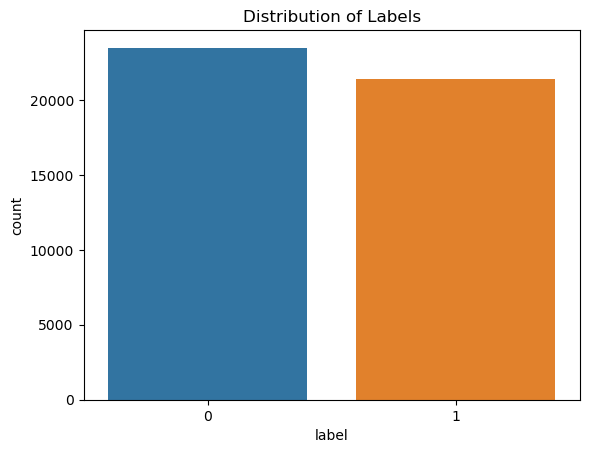

In [8]:
sns.countplot(x='label', data=combined_df)
plt.title('Distribution of Labels')
plt.show()

In [9]:
def clean_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Convert to lower case
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    # Or use Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

In [10]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(combined_df['cleaned_text'])
y = combined_df['label']

In [13]:
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())

   abl  abort  absolut  abus    accept  access    accord  account  accus  \
0  0.0    0.0      0.0   0.0  0.047241     0.0  0.000000      0.0    0.0   
1  0.0    0.0      0.0   0.0  0.000000     0.0  0.140165      0.0    0.0   
2  0.0    0.0      0.0   0.0  0.000000     0.0  0.000000      0.0    0.0   
3  0.0    0.0      0.0   0.0  0.000000     0.0  0.000000      0.0    0.0   
4  0.0    0.0      0.0   0.0  0.079085     0.0  0.000000      0.0    0.0   

   across  ...  worker     world  worri     would     wrong  wrote      year  \
0     0.0  ...     0.0  0.000000    0.0  0.042552  0.050266    0.0  0.395802   
1     0.0  ...     0.0  0.075744    0.0  0.000000  0.000000    0.0  0.000000   
2     0.0  ...     0.0  0.000000    0.0  0.000000  0.000000    0.0  0.000000   
3     0.0  ...     0.0  0.000000    0.0  0.082508  0.000000    0.0  0.031977   
4     0.0  ...     0.0  0.059304    0.0  0.000000  0.000000    0.0  0.000000   

        yet      york     young  
0  0.000000  0.000000  0.000